## 이미지 데이터 전처리

In [ ]:
MNIST 데이터 셋 사용 이미지 데이터 전처리
- 이미지 데이터 확인
- 이미지 차원 변환
- 정규화 (Normalization)
- 원-핫 인코딩 (바이너리화)

In [ ]:
- 흑백 손글시 숫자 이미지(28x28 픽셀)을 10개의 범주(0~9)로 분류
- MNIST 데이터 셋 사용
- 1980년대 미국 국립표준기술연구소에서 수집한
- 6만 개의 훈련 이미지와 1만 개의 테스트 이미지로 구성
- MNIST 데이터 셋은 넘파이 배열 형태로 케라스에 이미 포함되어 있음

In [2]:
# MINST 데이터 셋 로드

from keras. datasets import mnist

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('학습셋 이미지 수 : %d 개' % (X_train.shape[0]))
print('테스트셋 이미지 수 : %d 개' % (X_test.shape[0]))

학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_train.ndim

3

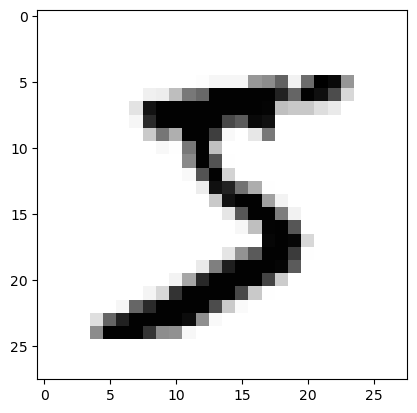

In [5]:
# 첫 번재 이미지 그래프로 출력
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [ ]:
이미지 코드 확인
- 가로 세로 28 x 28 = 784 픽셀
- 각 픽셀은 밝기 정도에 따라 0~255 등급
- 흰색 : 0
- 글씨 : 1~255 숫자 중 하나
- 긴 행렬로 이루어지 하나의 집합으로 변환됨

In [6]:
X_train[0] # 28 x 28

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
X_train[0].shape

(28, 28)

In [13]:
for x in X_train[0]:
    for i in x:
        print(i, end=' ')
    print()

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 3 18 18 18 126 136 175 26 166 255 247 127 0 0 0 0 
0 0 0 0 0 0 0 0 30 36 94 154 170 253 253 253 253 253 225 172 253 242 195 64 0 0 0 0 
0 0 0 0 0 0 0 49 238 253 253 253 253 253 253 253 253 251 93 82 82 56 39 0 0 0 0 0 
0 0 0 0 0 0 0 18 219 253 253 253 253 253 198 182 247 241 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 80 156 107 253 253 205 11 0 43 154 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 14 1 154 253 90 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 139 253 190 2 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 11 190 253 70 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 35 241 225 160 108 1 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 81 240 253 253 119 25 0 0 0 0 0 0 0 0 0 


In [15]:
for x in X_train[0]:
    for i in x:
        print('%4s' % str(i) , end='')
    print()

# 숫자 5 

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0
   0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0
   0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0
   0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0

### 이미지 차원 변환

In [ ]:
이미지 차원 변환
- 2차원 배열을 1차월 배열로 변환
- 가로 28, 세로 28의 2차원 배열을 784개의 1차원 배열로 변경
- 이미지가 숫자의 집합으로 변경되어 학습 데이터 셋으로 사용됨
- reshape() 함수 사용

In [17]:
X_train = X_train.reshape(X_train.shape[0], 784)
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [18]:
X_train.shape

(60000, 784)

In [19]:
X_train.ndim

2

### 정규화 (Normalization)

In [ ]:
정규화 (Normalization)
- 서로 다른 피처의 크기를 통일하기 위해 크기를 변환해주는 개념
- 현재 주어진 데이터의 값은 0~255까지의 정수
- 먼저 실수로 변환후 255로 나눔
- 0~1 사이의 값을 가지는 실수로 변환

In [20]:
# X_train 정규화
X_train = X_train.reshape(X_train.shape[0], 784)
X_train = X_train.astype('float32')/255

In [21]:
# 정규화 결과 확인
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [22]:
# X_test도 정규화
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

In [28]:
# X_test 정규화 확인
X_test[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [29]:
# 확인한 이미지가 실제 어떤 값인지 클래스 값 확인
print("class : %d" % (Y_train[0]))

class : 5


### 원-핫 인코딩

In [ ]:
원-핫 인코딩
- 바이너리화
- 인덱스에 해당되는 값은 1이고 나머지는 0인 2진 코드로 변환
- to_categorical() 함수 사용

In [31]:
# 원-핫 인코딩
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)

In [32]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [33]:
Y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)